In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import skimage.io as io
import sys
import random
import numpy as np
sys.path.append("./coco/PythonAPI")
from pycocotools.coco import COCO
from pycocotools import mask
import time
def mtx_plot(fnmtx, ratio):
    h = len(fnmtx[0])
    w = len(fnmtx)
    k = 1
    fig = plt.figure(figsize=(ratio[0]*h, ratio[1]*w))
    for fnarr in fnmtx:
        for fn in fnarr:
            fig.add_subplot(w,h,k)
            fn(k)
            k += 1

In [3]:
coco = COCO("./annotations/instances_train2014.json")

loading annotations into memory...
Done (t=10.20s)
creating index...
index created!


In [4]:
catIds = coco.getCatIds() # type: List[int]
cats = coco.loadCats(catIds) # type: List[dict]
print(cats[0])
catNames = [cat['name'] for cat in cats] # type: List[str]
print("catNames:", catNames)
superCatNames = list(set([cat['supercategory'] for cat in cats])) # type: List[str]
print("superCatNames:", superCatNames)


{'id': 1, 'name': 'person', 'supercategory': 'person'}
catNames: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
superCatNames: ['kitchen', 'indoor', 'accessory', 'outdoor', 'vehicle', '

In [12]:
imgIds = coco.getImgIds(catIds=coco.getCatIds(catNms=['person'])) # type: List[int]
imgInfos = coco.loadImgs(imgIds)
print("info:", imgInfos[0])
imgs = ((imgInfo, data_aug(imgInfo)) for imgInfo in imgInfos) # type: Iterator[Tuple[dict, np.ndarray]]
length = len(imgInfos) # type: int
print(imgs, length)

info: {'date_captured': '2013-11-20 02:07:55', 'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg', 'file_name': 'COCO_train2014_000000262145.jpg', 'width': 640, 'coco_url': 'http://mscoco.org/images/262145', 'height': 427, 'id': 262145, 'license': 2}
<generator object <genexpr> at 0x7fa45d712e60> 45174


In [11]:
def data_aug(imgInfo: dict) -> np.ndarray :
    start = time.time()
    img = io.imread(imgInfo['coco_url'])
    end = time.time()
    print('%30s' % 'serial in ', str((end - start)*1000), 'ms')
    return img

80
                    serial in  4080.6939601898193 ms
COCO_train2014_000000262145.jpg (427, 640, 3) uint8
                    serial in  2861.093521118164 ms
COCO_train2014_000000262146.jpg (640, 480, 3) uint8
                    serial in  2628.7763118743896 ms
COCO_train2014_000000524291.jpg (426, 640, 3) uint8


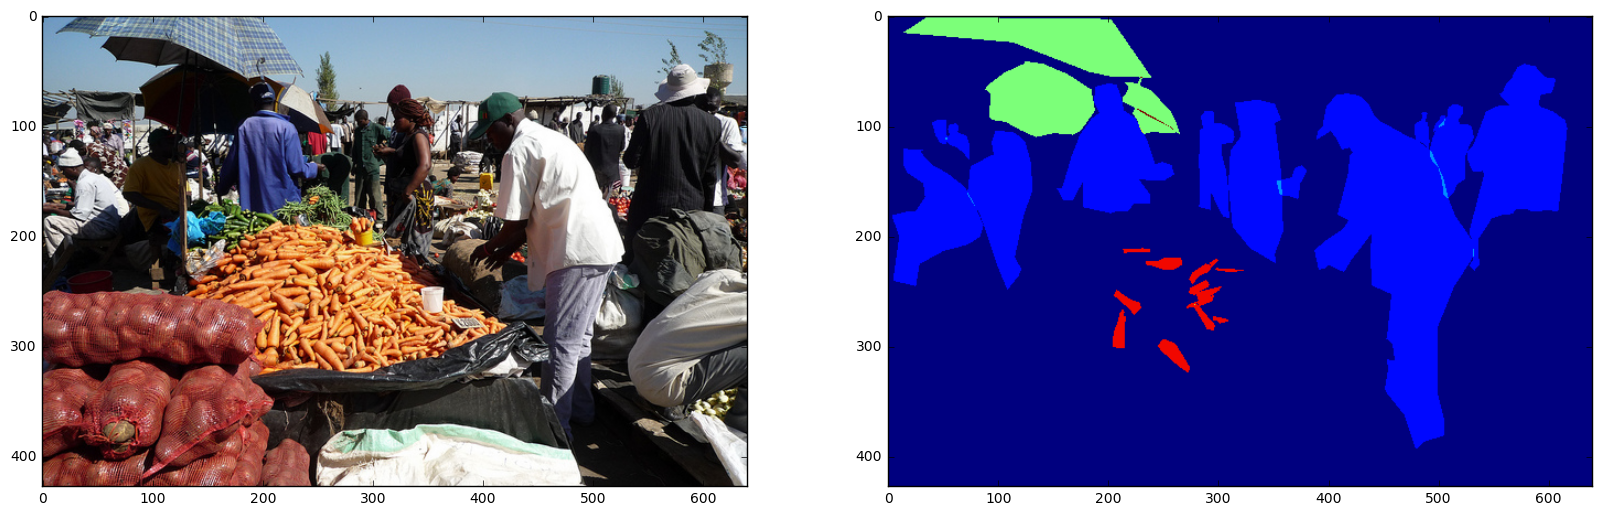

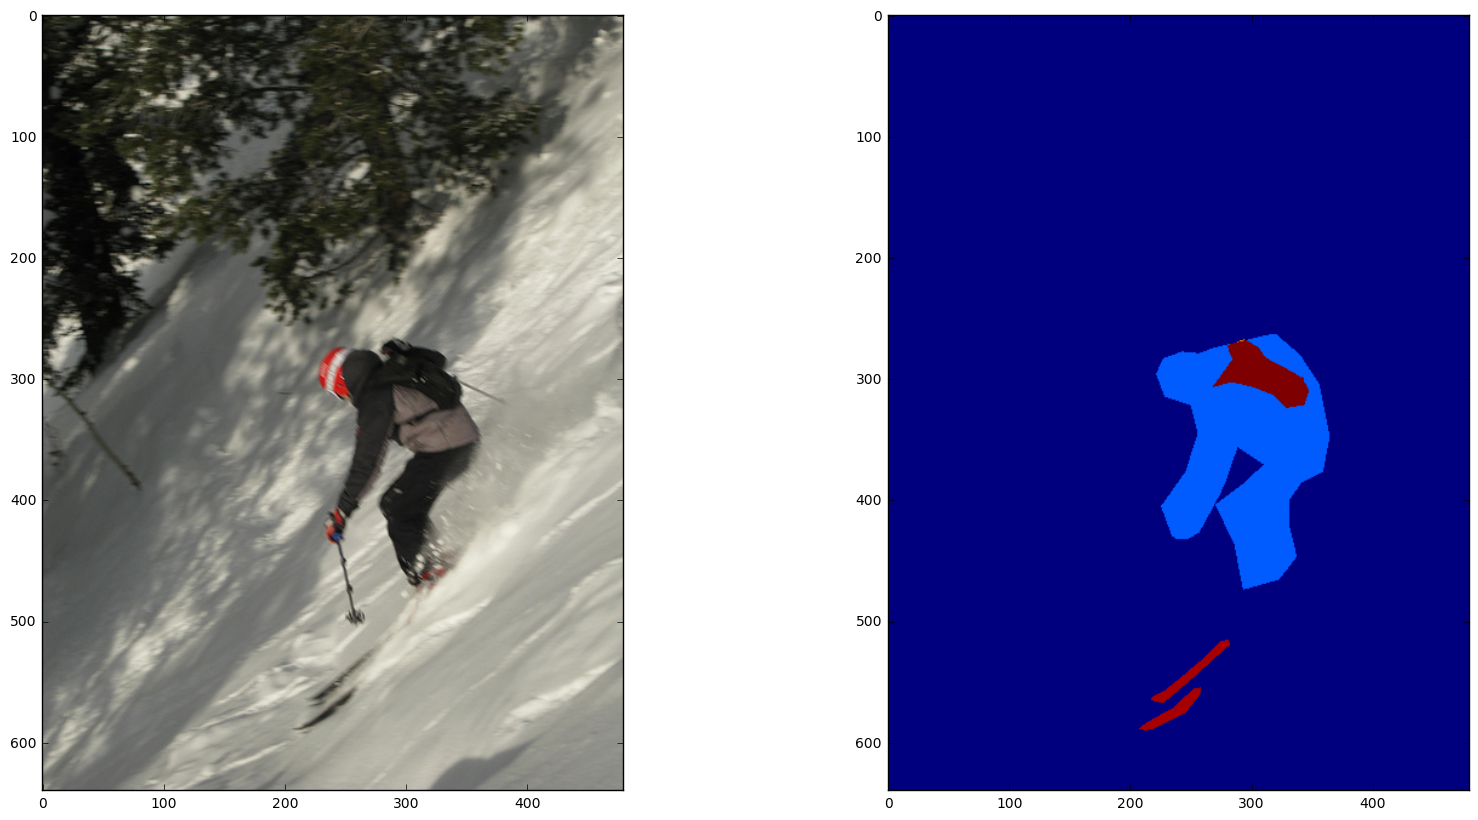

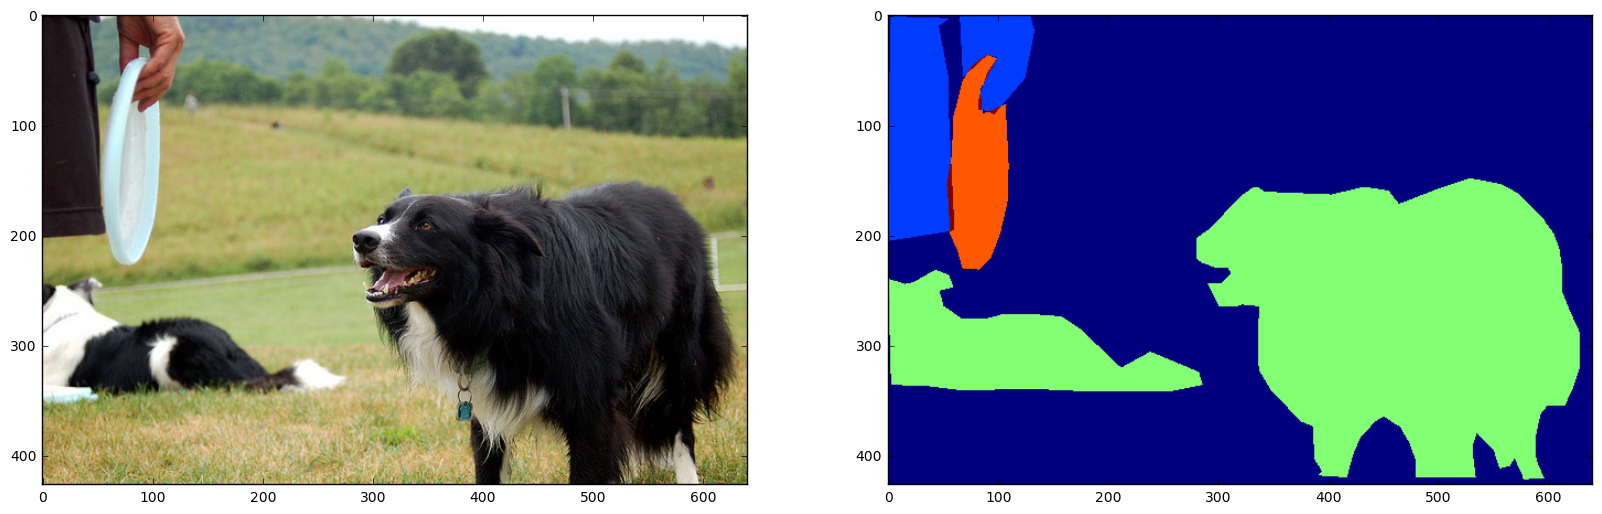

In [13]:
cats_num = len([cat['name'] for cat in coco.loadCats(coco.getCatIds())])
print(cats_num)

for (_, (info, img)) in zip(range(3), imgs):
    print(info["file_name"], img.shape, img.dtype)
    anns = coco.loadAnns(coco.getAnnIds(imgIds=[info['id']],iscrowd=False)) # type: List[dict]
    mask_all = np.zeros((img.shape[0], img.shape[1]), np.uint8)
    for ann in anns:
        #print([cat["name" ] for cat in coco.loadCats([ann["category_id"]])], ann["category_id"])
        rles = mask.frPyObjects(ann["segmentation"], img.shape[0], img.shape[1]) # type: List[dict]
        for i, rle in enumerate(rles):
            mask_img = mask.decode(rle) # type: np.ndarray
            mask_all += mask_img * int(255/cats_num * (ann["category_id"]*0.9 + cats_num*0.1))
    mtx_plot([[lambda x: plt.imshow(img), lambda x: plt.imshow(mask_all)]], (10, 10))

NameError: name 'l' is not defined

In [ ]:
L